In [1]:
import numpy as np
import matplotlib.pyplot as plt
from source.coordinate_descent import CoordinateDescent

# Generated example no. 1

In [2]:
np.random.seed(11)
m = 100
X = np.random.normal(size=(m, 2))
X = X / (np.linalg.norm(X, axis=0))
theta = np.array([0.2, -0.5]).reshape((-1, 1))
y = X @ theta

In [3]:
gen1 = CoordinateDescent(0, False)
gen1.fit(X,y, iters=20)
gen1.theta

 50%|█████     | 10/20 [00:00<00:00, 1522.32it/s]


array([ 0.2, -0.5])

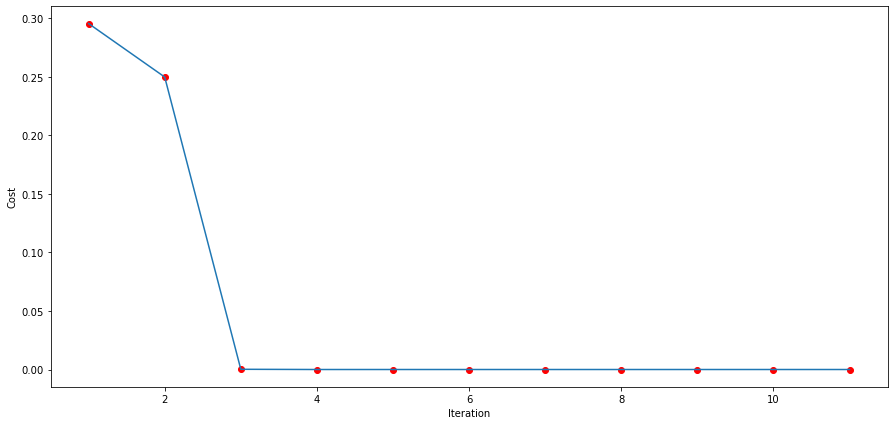

In [4]:
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1, gen1.costs.shape[0]+1), gen1.costs, 'o', color = 'red')
plt.plot(range(1, gen1.costs.shape[0]+1), gen1.costs, '-')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()

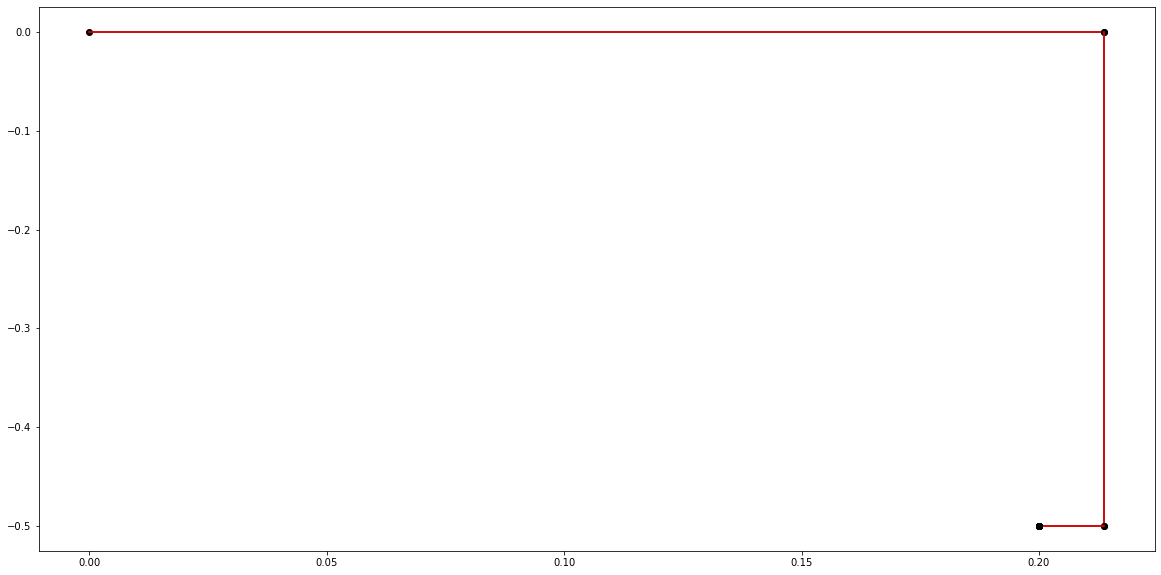

In [5]:
fig = plt.figure(figsize=(20, 10))
for i in range(1, 100):
    gen1p = gen1.path[(i - 1):(i + 1), :]
    plt.plot(gen1p[:, 0], gen1p[:, 1], marker='o', color='black')
    plt.plot(gen1p[:, 0], gen1p[:, 1], linestyle='-', color='red')
plt.show()

In [6]:
arange = np.arange(5)

thetas = gen1.theta.copy()

for i in arange[1:]:
    gen1_tmp = CoordinateDescent(i, False)
    gen1_tmp.fit(X, y, method = 'randomized')
    thetas = np.vstack((thetas, gen1_tmp.theta.copy()))

  0%|          | 3/1000 [00:00<00:00, 2878.73it/s]


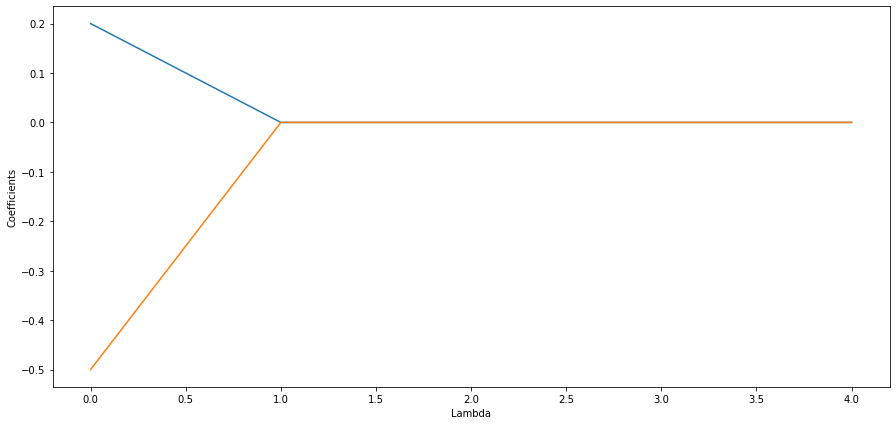

In [7]:
fig = plt.figure(figsize=(15, 7))
plt.plot(arange, thetas[:, 0])
plt.plot(arange, thetas[:, 1])
plt.xlabel('Lambda')
plt.ylabel('Coefficients')
plt.show()

# Generated example no. 2

In [8]:
np.random.seed(23)
m = 400
X = np.random.normal(size=(m, 6))
X = np.hstack([np.ones(m).reshape((m, 1)), X])
X = X / (np.linalg.norm(X, axis=0))
theta = np.array([1.75, -0.25, 0.5, -1, 2, -4, 8]).reshape((-1, 1))
y = X @ theta + np.random.normal(0, 0.01, size=(m, 1))

In [9]:
gen2 = CoordinateDescent(0, True)
gen2.fit(X, y, method = 'greedy', iters=100)
gen2.theta

 56%|█████▌    | 56/100 [00:00<00:00, 1368.69it/s]


array([ 1.72477484, -0.25356702,  0.50459292, -0.99388254,  1.98759779,
       -3.98923482,  7.99968646])

 47%|████▋     | 47/100 [00:00<00:00, 964.95it/s]


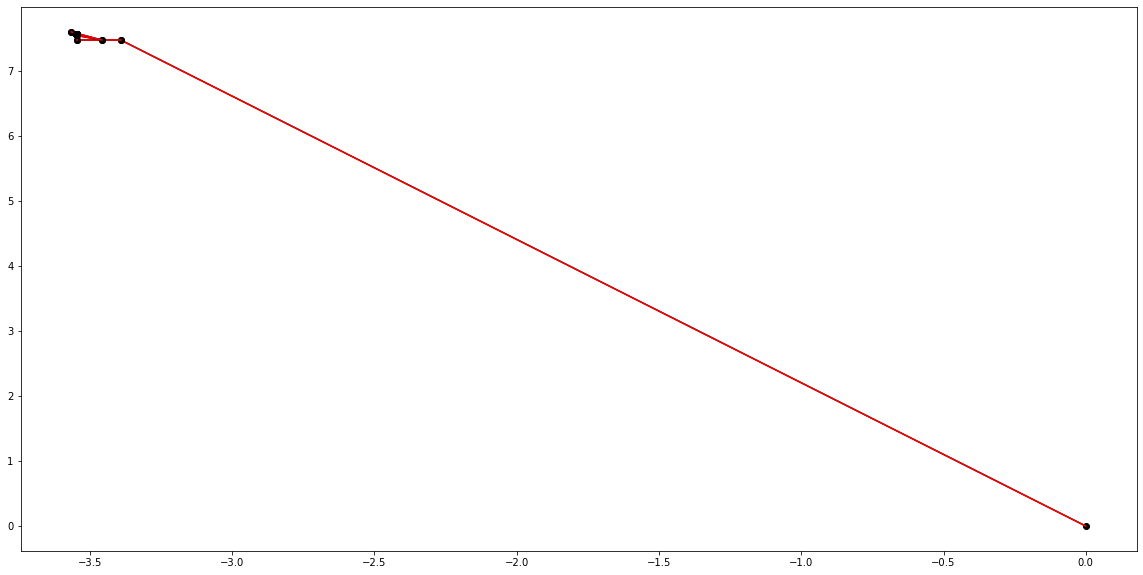

In [10]:
gen2_1 = CoordinateDescent(0.4, True)
gen2_1.fit(X, y, method = 'greedy', iters=100)


fig = plt.figure(figsize=(20, 10))
for i in range(1, gen2_1.path.shape[0]):
    gen2p = gen2_1.path[(i - 1):(i + 1), :]
    plt.plot(gen2p[:, 5], gen2p[:, 6], marker='o', color='black')
    plt.plot(gen2p[:, 5], gen2p[:, 6], linestyle='-', color='red')
plt.show()

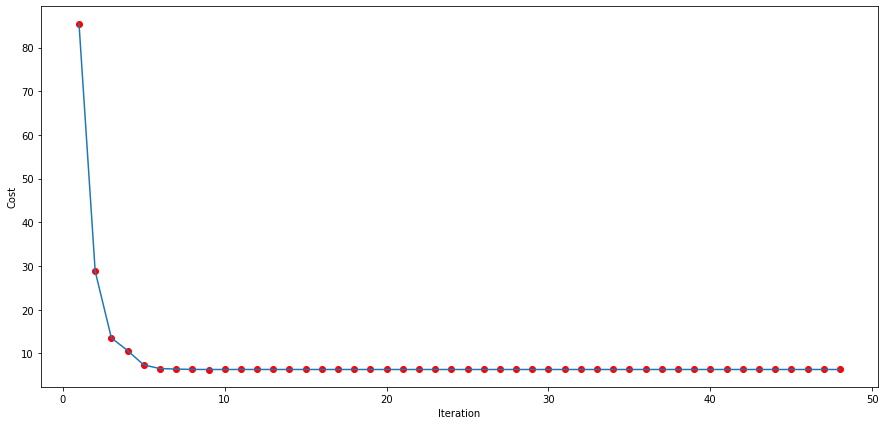

In [11]:
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1, gen2_1.costs.shape[0]+1), gen2_1.costs, 'o', color = 'red')
plt.plot(range(1, gen2_1.costs.shape[0]+1), gen2_1.costs, '-')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()

In [12]:
arange = np.arange(100)/10

thetas = gen2.theta.copy()

for i in arange[1:]:
    gen2_tmp = CoordinateDescent(i, True)
    gen2_tmp.fit(X, y, method = 'greedy')
    thetas = np.vstack((thetas, gen2_tmp.theta.copy()))

  0%|          | 1/1000 [00:00<?, ?it/s]


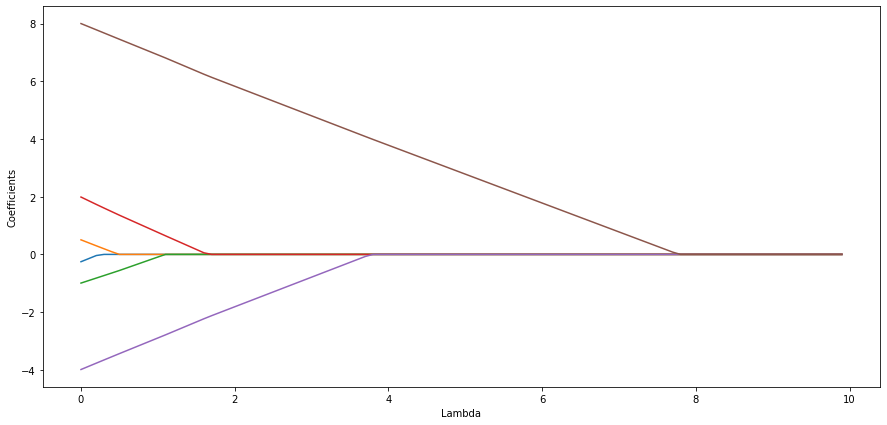

In [13]:
fig = plt.figure(figsize=(15, 7))
for i in range(1, gen2.n):
    plt.plot(arange, thetas[:, i])
plt.xlabel('Lambda')
plt.ylabel('Coefficients')
plt.show()

# Generated example no. 3

In [14]:
np.random.seed(298911)
m = 500
X = np.random.normal(size=(m, 20))
X = X / (np.linalg.norm(X, axis=0))
#y = 2 - np.log(X[:, 0:1]+10) + 3*np.power(X[:, 1:2], 2) - 0.5*X[:, 1:2] + np.random.normal(0, 0.05, size = (m, 1))
y = 10 * X[:, 0:1] + 4 * X[:, 1:2] + np.random.normal(0, 1, size=(m, 1))

In [15]:
idx1 = int(m * 0.6)
idx2 = int(m * 0.8)
X_train = X[:idx1, :]
X_valid = X[idx1:idx2, :]
X_test = X[idx2:, :]
y_train = y[:idx1, :]
y_valid = y[idx1:idx2, :]
y_test = y[idx2:, :]

In [16]:
gen3 = CoordinateDescent(0, False)
gen3.fit(X_train, y_train, iters=2000)
gen3.theta

 17%|█▋        | 347/2000 [00:00<00:00, 5163.22it/s]


array([10.28814   ,  3.51165081,  0.93019808,  0.69911958, -1.25436885,
        2.14946061,  0.68621135,  1.71902855, -1.16558382, -0.83978725,
        2.7550893 ,  1.71925252,  0.69096171, -0.63336203, -1.35476078,
       -0.99640423, -2.48866507, -1.2046632 ,  0.72053977, -1.20998982])

In [17]:
arange = np.arange(200) / 10
errors = [np.power(gen3.predict(X_valid) - y_valid, 2).mean()]

for i in arange[1:]:
    gen3_tmp = CoordinateDescent(i, False)
    gen3_tmp.fit(X_train, y_train, iters=500)
    err = np.power(gen3_tmp.predict(X_valid) - y_valid, 2).mean()
    errors.append(err)

  4%|▍         | 19/500 [00:00<00:00, 2374.68it/s]


  4%|▍         | 19/500 [00:00<?, ?it/s]


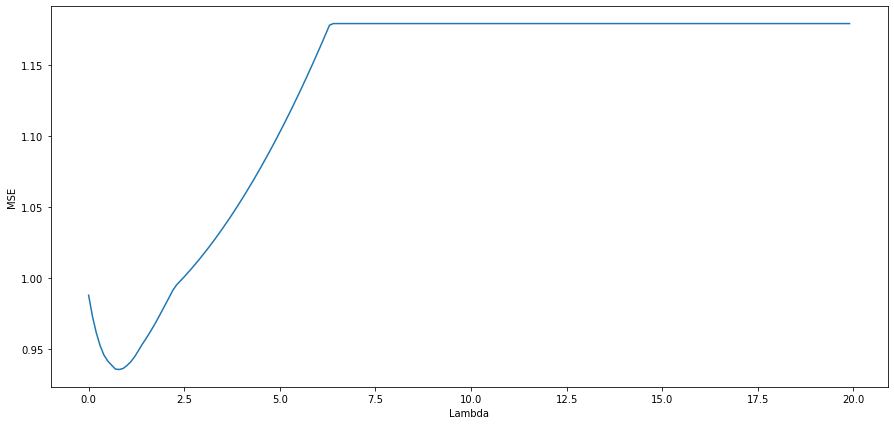

In [18]:
fig = plt.figure(figsize=(15, 7))
plt.plot(arange, errors)
plt.xlabel('Lambda')
plt.ylabel('MSE')
plt.show()

In [19]:
min_idx = np.where(errors == min(errors))[0][0]
min_idx

8

In [20]:
gen3_best = CoordinateDescent(arange[min_idx], False)
gen3_best.fit(X_train, y_train, iters=200)
print(gen3_best.theta)
np.power(y_test - gen3_best.predict(X_test), 2).mean()

100%|██████████| 200/200 [00:00<00:00, 8254.64it/s]

[ 8.69566341  2.28714713  0.          0.         -0.33425595  0.63554828
  0.          0.          0.          0.          1.14957166  0.21059275
  0.          0.          0.          0.         -1.56360031 -0.02369315
  0.          0.        ]


0.9069593252856896

In [21]:
beta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
print(beta)
np.power(X_test @ beta - y_test, 2).mean()

[[10.28814   ]
 [ 3.51165081]
 [ 0.93019808]
 [ 0.69911958]
 [-1.25436885]
 [ 2.14946061]
 [ 0.68621135]
 [ 1.71902855]
 [-1.16558382]
 [-0.83978725]
 [ 2.7550893 ]
 [ 1.71925252]
 [ 0.69096171]
 [-0.63336203]
 [-1.35476078]
 [-0.99640423]
 [-2.48866507]
 [-1.2046632 ]
 [ 0.72053977]
 [-1.20998982]]


0.9951213264111308

# Generated example no. 4

In [22]:
np.random.seed(0)
m = 1000
X = np.random.normal(size=(m, 10))
X = np.hstack([np.ones(m).reshape((m, 1)), X])
X = X / (np.linalg.norm(X, axis=0))
theta = np.array([1.75, -0.25, 0.5, -1, 2, -4, 8, 16, -32, 64, -128]).reshape((-1, 1))
y = X @ theta + np.random.normal(0, 0.01, size=(m, 1))

In [23]:
lambda_ = 0.1
iters = 1000

gen_cyclic = CoordinateDescent(lambda_)
gen_cyclic.fit(X, y, iters=iters, method = 'cyclic')

gen_randomized = CoordinateDescent(lambda_)
gen_randomized.fit(X, y, iters=iters, method = 'randomized')

gen_greedy = CoordinateDescent(lambda_)
gen_greedy.fit(X, y, iters=iters, method = 'greedy')

  9%|▉         | 90/1000 [00:00<00:06, 141.19it/s]


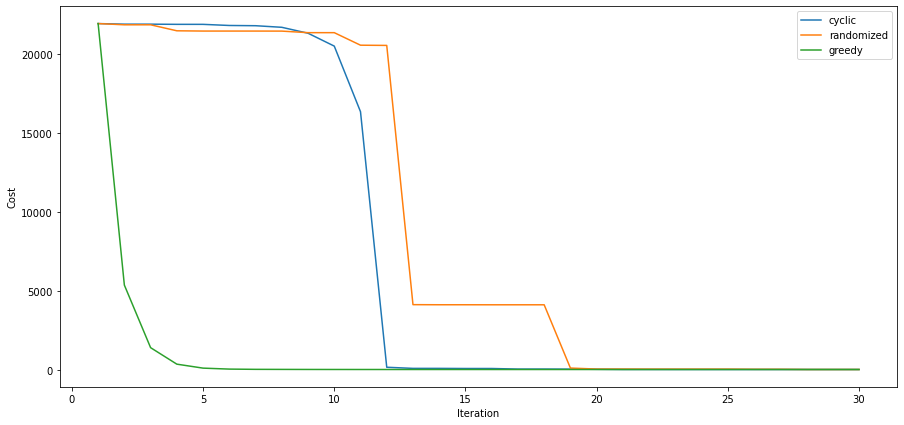

In [24]:
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1, 31), gen_cyclic.costs[:30])
plt.plot(range(1, 31), gen_randomized.costs[:30])
plt.plot(range(1, 31), gen_greedy.costs[:30])
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend(['cyclic', 'randomized', 'greedy'])
plt.show()

In [25]:
lambda_ = 1

gen_greedy = CoordinateDescent(lambda_)
gen_greedy.fit(X, y, iters=iters, method = 'greedy')

gen_greedy_initial_guess = CoordinateDescent(lambda_)
initial_guess = (np.linalg.inv(X.T @ X) @ X.T @ y).reshape(-1)
gen_greedy_initial_guess.fit(X, y, iters=iters, method = 'greedy', initial_guess = initial_guess)

  7%|▋         | 67/1000 [00:00<00:03, 276.37it/s]


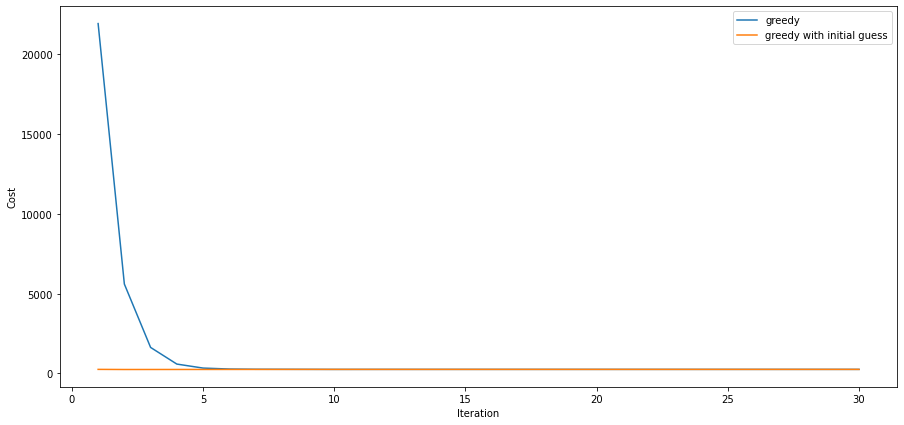

In [26]:
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1, 31), gen_greedy.costs[:30])
plt.plot(range(1, 31), gen_greedy_initial_guess.costs[:30])
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend(['greedy', 'greedy with initial guess'])
plt.show()